# **Exploratory Data Analysis on H&M**

Before start making reccommended items model, I check the trend of data.

**Data Preparation**

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from PIL import Image
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.dates as mdates

In [2]:
# Connect google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Read the csv files
articles_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/h-and-m-personalized-fashion-recommendations/articles.csv")
customers_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/h-and-m-personalized-fashion-recommendations/customers.csv")
transactions_train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/h-and-m-personalized-fashion-recommendations/transactions_train.csv")

# Check the data

In [ ]:
# Check the data
articles_df.head()

article_id  product_code          prod_name  product_type_no  \
0   108775015        108775          Strap top              253   
1   108775044        108775          Strap top              253   
2   108775051        108775      Strap top (1)              253   
3   110065001        110065  OP T-shirt (Idro)              306   
4   110065002        110065  OP T-shirt (Idro)              306   

  product_type_name  product_group_name  graphical_appearance_no  \
0          Vest top  Garment Upper body                  1010016   
1          Vest top  Garment Upper body                  1010016   
2          Vest top  Garment Upper body                  1010017   
3               Bra           Underwear                  1010016   
4               Bra           Underwear                  1010016   

  graphical_appearance_name  colour_group_code colour_group_name  ...  \
0                     Solid                  9             Black  ...   
1                     Solid                 10             White  ...   
2                    Stripe                 11         Off White  ...   
3                     Solid                  9             Black  ...   
4                     Solid                 10             White  ...   

   department_name index_code        index_name index_group_no  \
0     Jersey Basic          A        Ladieswear              1   
1     Jersey Basic          A        Ladieswear              1   
2     Jersey Basic          A        Ladieswear              1   
3   Clean Lingerie          B  Lingeries/Tights              1   
4   Clean Lingerie          B  Lingeries/Tights              1   

   index_group_name section_no            section_name garment_group_no  \
0        Ladieswear         16  Womens Everyday Basics             1002   
1        Ladieswear         16  Womens Everyday Basics             1002   
2        Ladieswear         16  Womens Everyday Basics             1002   
3        Ladieswear         61         Womens Lingerie             1017   
4        Ladieswear         61         Womens Lingerie             1017   

   garment_group_name                                        detail_desc  
0        Jersey Basic            Jersey top with narrow shoulder straps.  
1        Jersey Basic            Jersey top with narrow shoulder straps.  
2        Jersey Basic            Jersey top with narrow shoulder straps.  
3   Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  
4   Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  

[5 rows x 25 columns]

In [ ]:
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [ ]:
customers_df.head()

customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  NaN     NaN   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  NaN     NaN   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  NaN     NaN   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  NaN     NaN   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   

  club_member_status fashion_news_frequency   age  \
0             ACTIVE                   NONE  49.0   
1             ACTIVE                   NONE  25.0   
2             ACTIVE                   NONE  24.0   
3             ACTIVE                   NONE  54.0   
4             ACTIVE              Regularly  52.0   

                                         postal_code  
0  52043ee2162cf5aa7ee79974281641c6f11a68d276429a...  
1  2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...  
2  64f17e6a330a85798e4998f62d0930d14db8db1c054af6...  
3  5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...  
4  25fa5ddee9aac01b35208d01736e57942317d756b32ddd...

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [ ]:
transactions_train_df.head()

t_dat                                        customer_id  article_id  \
0  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001   
1  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   541518023   
2  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   505221004   
3  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687003   
4  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687004   

      price  sales_channel_id  
0  0.050831                 2  
1  0.030492                 2  
2  0.015237                 2  
3  0.016932                 2  
4  0.016932                 2

In [ ]:
transactions_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [ ]:
# Check the missing values
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [ ]:
missing_data(articles_df)

Total   Percent
detail_desc                     416  0.394156
perceived_colour_master_name      0  0.000000
garment_group_name                0  0.000000
garment_group_no                  0  0.000000
section_name                      0  0.000000
section_no                        0  0.000000
index_group_name                  0  0.000000
index_group_no                    0  0.000000
index_name                        0  0.000000
index_code                        0  0.000000
department_name                   0  0.000000
department_no                     0  0.000000
article_id                        0  0.000000
product_code                      0  0.000000
perceived_colour_value_name       0  0.000000
perceived_colour_value_id         0  0.000000
colour_group_name                 0  0.000000
colour_group_code                 0  0.000000
graphical_appearance_name         0  0.000000
graphical_appearance_no           0  0.000000
product_group_name                0  0.000000
product_type_name                 0  0.000000
product_type_no                   0  0.000000
prod_name                         0  0.000000
perceived_colour_master_id        0  0.000000

In [ ]:
missing_data(customers_df)

Total    Percent
Active                  907576  66.150819
FN                      895050  65.237831
fashion_news_frequency   16011   1.167000
age                      15861   1.156066
club_member_status        6062   0.441843
customer_id                  0   0.000000
postal_code                  0   0.000000

In [ ]:
missing_data(transactions_train_df)

Total  Percent
t_dat                 0      0.0
customer_id           0      0.0
article_id            0      0.0
price                 0      0.0
sales_channel_id      0      0.0

In [ ]:
# Check the unique values
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return tt

In [ ]:
unique_values(articles_df)

Total  Uniques
article_id                    105542   105542
product_code                  105542    47224
prod_name                     105542    45875
product_type_no               105542      132
product_type_name             105542      131
product_group_name            105542       19
graphical_appearance_no       105542       30
graphical_appearance_name     105542       30
colour_group_code             105542       50
colour_group_name             105542       50
perceived_colour_value_id     105542        8
perceived_colour_value_name   105542        8
perceived_colour_master_id    105542       20
perceived_colour_master_name  105542       20
department_no                 105542      299
department_name               105542      250
index_code                    105542       10
index_name                    105542       10
index_group_no                105542        5
index_group_name              105542        5
section_no                    105542       57
section_name                  105542       56
garment_group_no              105542       21
garment_group_name            105542       21
detail_desc                   105126    43404

In [ ]:
unique_values(customers_df)

Total  Uniques
customer_id             1371980  1371980
FN                       476930        1
Active                   464404        1
club_member_status      1365918        3
fashion_news_frequency  1355969        3
age                     1356119       84
postal_code             1371980   352899

In [ ]:
unique_values(transactions_train_df)

Total  Uniques
t_dat             31788324      734
customer_id       31788324  1362281
article_id        31788324   104547
price             31788324     9857
sales_channel_id  31788324        2

# Summary of the data

- Check the trends of the data
- Use both matplotlib and plotly to show both skills

# 'Articles' data

*   article_id (Primary Key): A unique identifier of every article
*   product_code. prod_name: A unique identifier of every product and its name.
*   product_type_no, product_type_name: The group of product_code and its name
*   product_group_name
*   graphical_appearance_no, graphical_appearance_name: The group of graphics and its name
*   colour_group_code, colour_group_name: The group of color and its name
*   perceived_colour_value_id, perceived_colour_value_name, perceived_colour_master_id, perceived_colour_master_name: The added color info
*   department_no, department_name: A unique identifier of every dep and its name
*   index_code, index_name: A unique identifier of every index and its name
*   index_group_no, index_group_name: A group of indeces and its name
*   section_no, section_name: : A unique identifier of every section and its name
*   garment_group_no, garment_group_name: A unique identifier of every garment and its name
*   detail_desc: Details

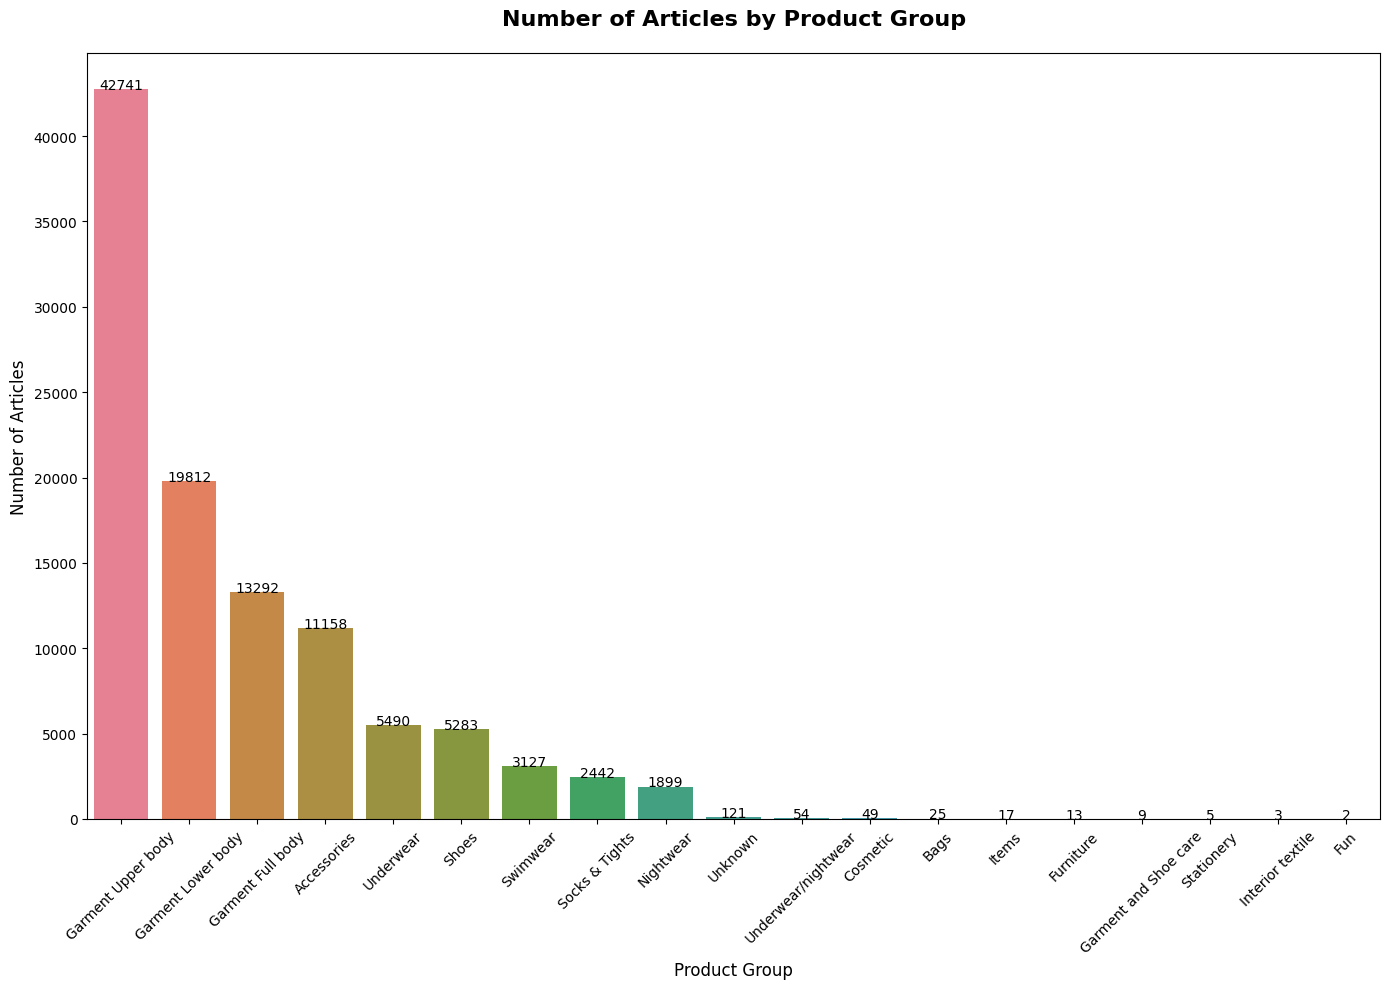

In [4]:
# Distribution of number of articles by product group
# Matplotlib and Seaborn Version

# Prepare the data
df = (articles_df.groupby("product_group_name")["article_id"]
      .nunique()
      .reset_index()
      .rename(columns={"product_group_name": "Product Group", "article_id": "Articles"})
      .sort_values("Articles", ascending=False))

# Set the color palette
num_groups = df['Product Group'].nunique()
palette = sns.color_palette("husl", num_groups)

# Create the bar plot
plt.figure(figsize=(14, 10))
sns.barplot(x="Product Group", y="Articles", data=df, palette=palette, hue="Product Group", dodge=False, legend=False)

# Add a title and axis labels
plt.title("Number of Articles by Product Group", fontsize=16, weight='bold', pad=20)
plt.xlabel("Product Group", fontsize=12)
plt.ylabel("Number of Articles", fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=10, ha='center')

# Add data labels
for i in range(df.shape[0]):
    plt.text(i, df['Articles'].values[i] + 5, df['Articles'].values[i], ha='center', fontsize=10)

# Adjust layout for aesthetics
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
# Distribution of number of articles per product group
# Plotly version

# Prepare the data
df = (articles_df.groupby("product_group_name")["article_id"]
      .nunique()
      .reset_index()
      .rename(columns={"product_group_name": "Product Group", "article_id": "Articles"})
      .sort_values("Articles", ascending=False))

# Make a plot
fig = px.bar(
    df,
    x='Product Group',
    y='Articles',
    title='Distribution of Articles Across Product Groups',
    color='Product Group',
    color_discrete_sequence=px.colors.qualitative.Prism,
    labels={"Articles": "Number of Articles", "Product Group": "Product Group"},
    text='Articles'
)

# Update the layout
fig.update_layout(
    title={"text": "Number of Articles by Product Group", "x": 0.5},
    xaxis_title='Product Group',
    yaxis_title='Number of Articles',
    xaxis_tickangle=-45,
    showlegend=False,
    plot_bgcolor="rgba(0,0,0,0)",
    font=dict(family="Arial, sans-serif", size=12)
)

# Update x-axis
fig.update_xaxes(categoryorder="total descending")

# Show the plot
fig.show()

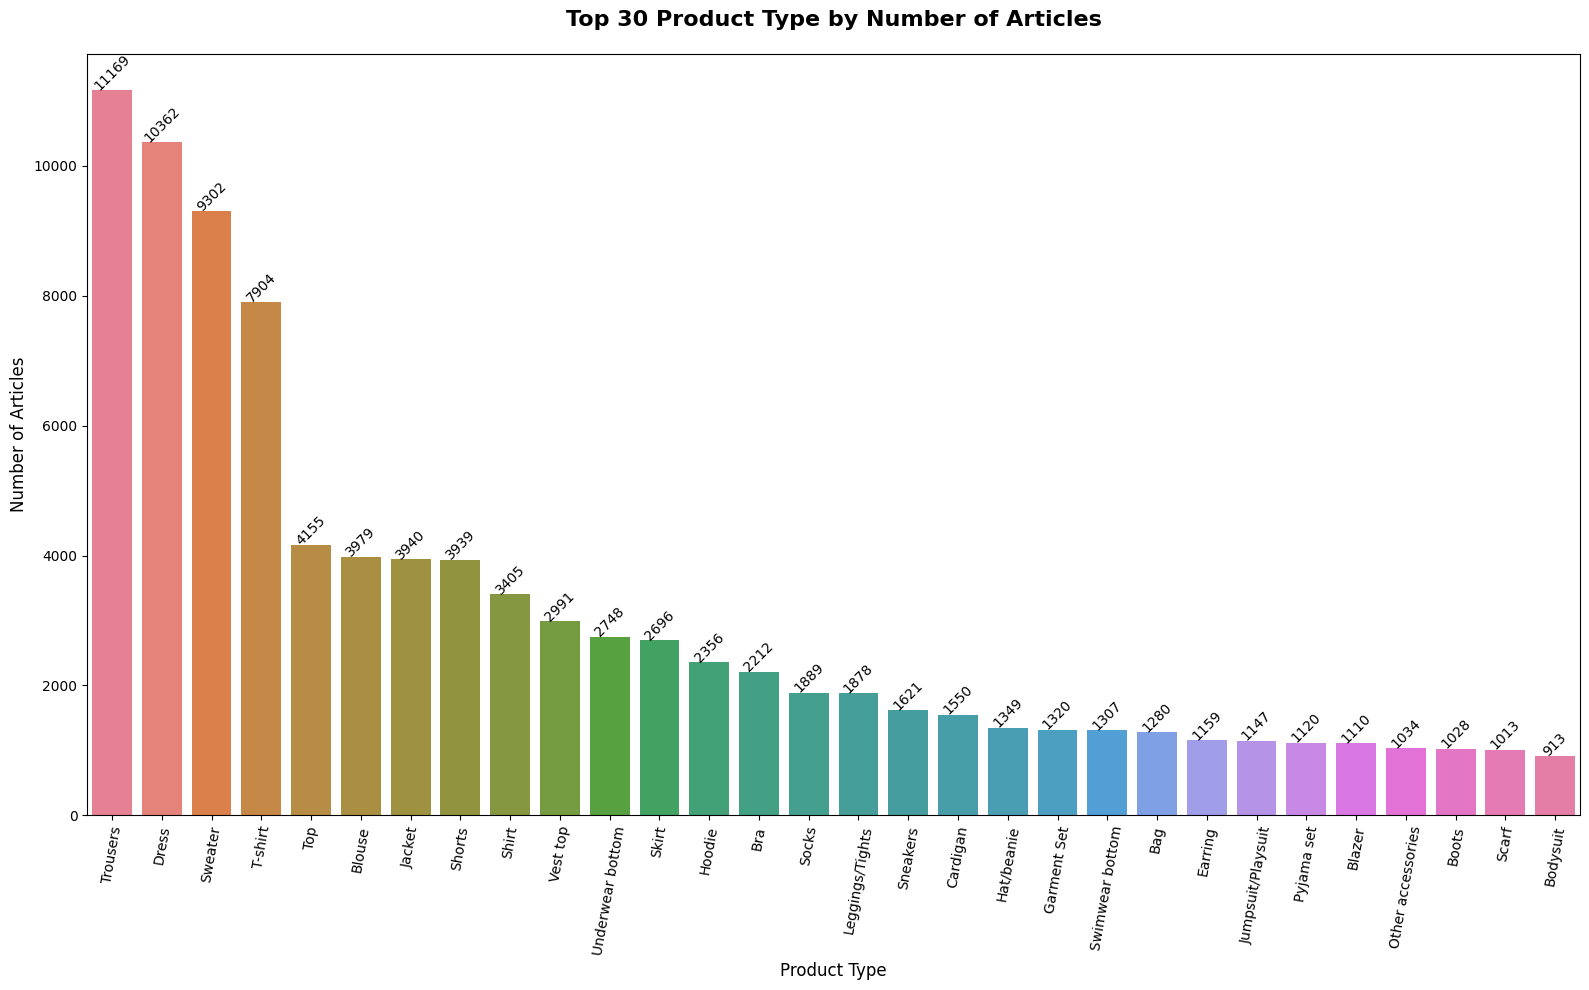

In [12]:
# Top 30 Product Type by Number of Articles
# Matplotlib and Seaborn version

# Prepare the data
df = (articles_df.groupby(["product_type_name"])["article_id"]
      .nunique()
      .reset_index()
      .rename(columns={"product_type_name": "Product Type", "article_id": "Articles"})
      .sort_values("Articles", ascending=False)
      .head(30))

# Adjust the palette length to match Top 30
palette = sns.color_palette("husl", 30)

# Create the bar plot
plt.figure(figsize=(16, 10))
sns.barplot(x="Product Type", y="Articles", data=df, palette=palette, hue="Product Type", dodge=False, legend=False)

# Add a title and axis labels
plt.title("Top 30 Product Type by Number of Articles", fontsize=16, weight='bold', pad=20)
plt.xlabel("Product Type", fontsize=12)
plt.ylabel("Number of Articles", fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=80, fontsize=10, ha='center')

# Add data labels
for i in range(df.shape[0]):
    plt.text(i, df['Articles'].values[i] + 5, df['Articles'].values[i], ha='center', rotation=45, fontsize=10)

# Adjust layout for aesthetics
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
# Top 30 Product Type by Number of Articles
# Plotly Version

# Prepare the data
df = (articles_df.groupby(["product_type_name"])["article_id"]
      .nunique()
      .reset_index()
      .rename(columns={"product_type_name": "Product Type", "article_id": "Articles"})
      .sort_values("Articles", ascending=False)
      .head(30))

# Make a plot
palette = px.colors.qualitative.Prism * (len(df) // len(px.colors.qualitative.Prism) + 1)
fig = px.bar(
    df,
    x='Product Type',
    y='Articles',
    title='Top 30 Product Type by Number of Articles',
    color='Product Type',
    color_discrete_sequence=px.colors.qualitative.Prism,
    labels={"Articles": "Number of Articles", "Product Type": "Product Type"},
    text='Articles'
)

# Update the layout
fig.update_layout(
    title={"text": "Top 30 Product Type by Number of Articles", "x": 0.5},
    xaxis_title='Product Type',
    yaxis_title='Number of Articles',
    xaxis_tickangle=-45,
    showlegend=False,
    plot_bgcolor="rgba(0,0,0,0)",
    font=dict(family="Arial, sans-serif", size=12)
)

# Update x-axis
fig.update_xaxes(categoryorder="total descending")

# Show the plot
fig.show()

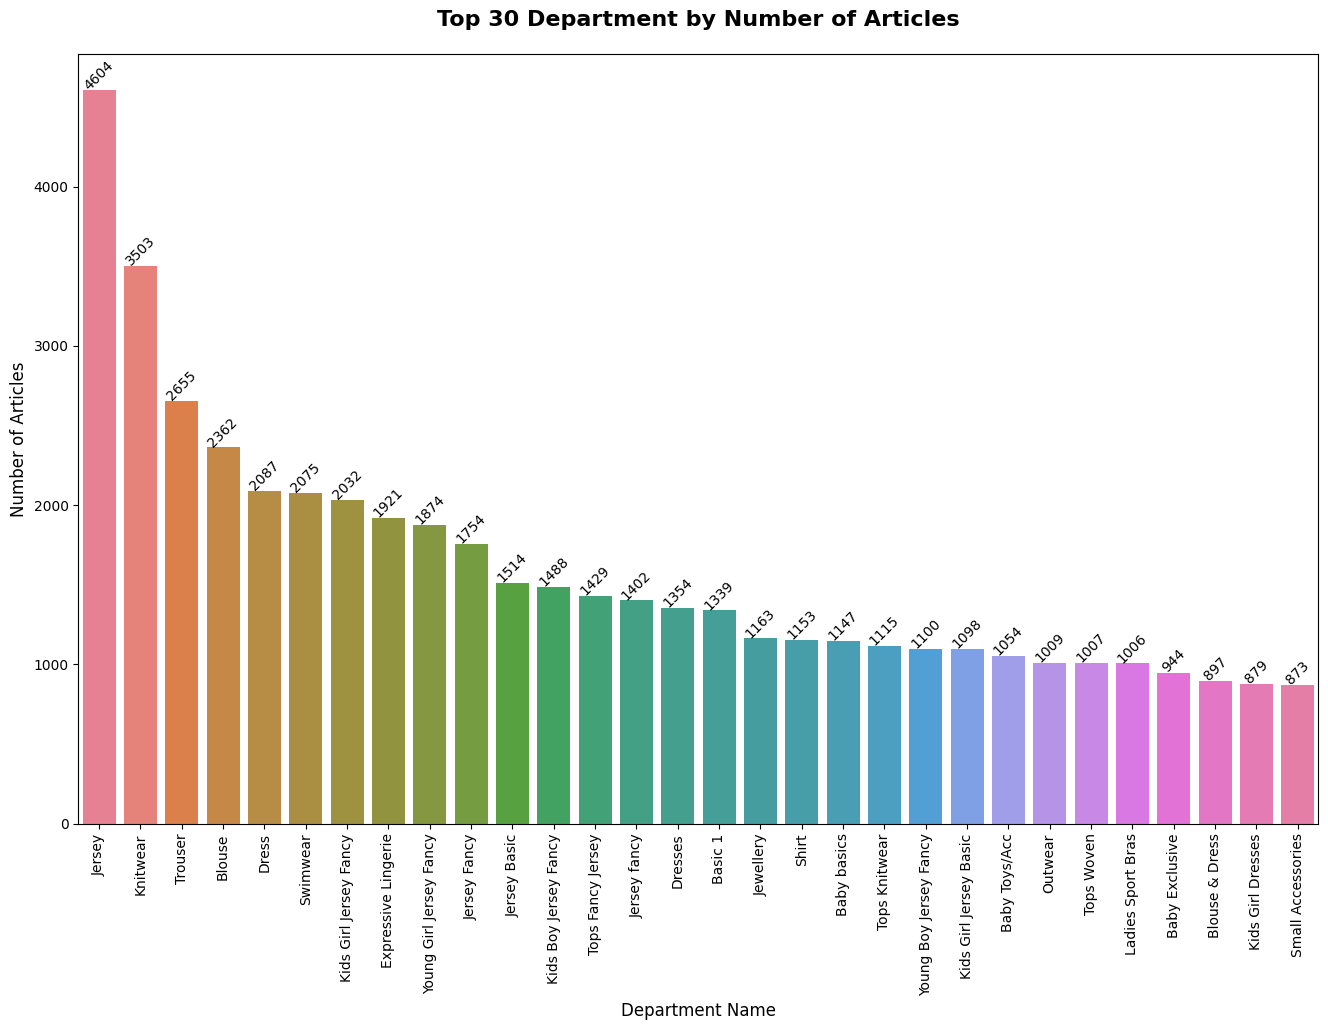

In [15]:
# Top 30 Department by Number of Articles
# Matplotlib and Seaborn version

# Prepare the data
df = (articles_df.groupby(["department_name"])["article_id"]
      .nunique()
      .reset_index()
      .rename(columns={"department_name": "Department Name", "article_id": "Articles"})
      .sort_values("Articles", ascending=False)
      .head(30))

# Adjust the palette length to match Top 30
palette = sns.color_palette("husl", 30)

# Plotting
plt.figure(figsize=(16, 10))
sns.barplot(x="Department Name", y="Articles", data=df, palette=palette, hue="Department Name", dodge=False, legend=False)

# Add a title and axis labels
plt.title("Top 30 Department by Number of Articles", fontsize=16, weight='bold', pad=20)
plt.xlabel("Department Name", fontsize=12)
plt.ylabel("Number of Articles", fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=90, fontsize=10, ha='center')

# Add data labels
for i in range(df.shape[0]):
    plt.text(i, df['Articles'].values[i] + 5, df['Articles'].values[i], ha='center', rotation=45, fontsize=10)

# Show the plot
plt.show()

In [17]:
# Top 30 Department by Number of Articles
# Plotly Version

# Prepare the data
df = (articles_df.groupby(["department_name"])["article_id"]
      .nunique()
      .reset_index()
      .rename(columns={"department_name": "Department Name", "article_id": "Articles"})
      .sort_values("Articles", ascending=False)
      .head(30))

# Make a plot
palette = px.colors.qualitative.Prism * (len(df) // len(px.colors.qualitative.Prism) + 1)
fig = px.bar(
    df,
    x='Department Name',
    y='Articles',
    title='Top 30 Department by Number of Articles',
    color='Department Name',
    color_discrete_sequence=px.colors.qualitative.Prism,
    labels={"Articles": "Number of Articles", "Department Name": "Department Name"},
    text='Articles'
)

# Update the layout
fig.update_layout(
    title={"text": "Top 30 Department by Number of Articles", "x": 0.5},
    xaxis_title='Department Name',
    yaxis_title='Number of Articles',
    xaxis_tickangle=-80,
    showlegend=False,
    plot_bgcolor="rgba(0,0,0,0)",
    font=dict(family="Arial, sans-serif", size=12)
)

# Update x-axis
fig.update_xaxes(categoryorder="total descending")

# Show the plot
fig.show()

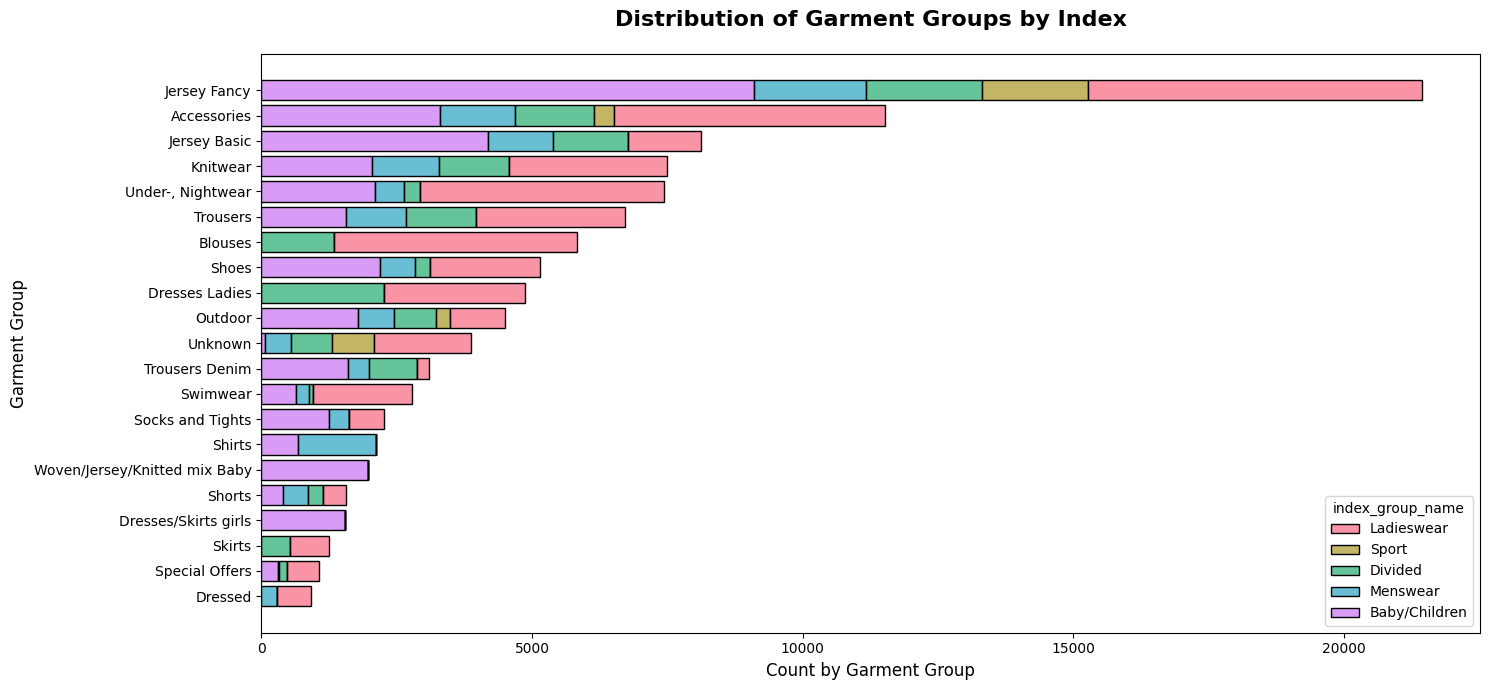

In [ ]:
# Garment group by index
# Matplotlib and Seaborn version

# Sort the original DataFrame based on the sorted index
articles_df_sorted = articles_df.set_index('garment_group_name').loc[sorted_data].reset_index()

# Set the number of unique groups for the color palette
num_groups = aggregated_df['index_group_name'].nunique()
palette = sns.color_palette("husl", num_groups)

# Make a plot
f, ax = plt.subplots(figsize=(15, 7))
sns.histplot(
    data=articles_df_sorted,
    y='garment_group_name',
    hue='index_group_name',
    multiple="stack",
    palette=palette,
    shrink=0.8
)

# Add labels and a descriptive title
ax.set_title("Distribution of Garment Groups by Index", fontsize=16, weight='bold', pad=20)
ax.set_xlabel('Count by Garment Group', fontsize=12)
ax.set_ylabel('Garment Group', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# Garment group by index
# Plotly Version

# Aggregate the data by garment group and index group
aggregated_df = articles_df.groupby(['garment_group_name', 'index_group_name']).size().reset_index(name='count')

# Calculate total counts for each garment group
total_counts = aggregated_df.groupby('garment_group_name')['count'].sum().reset_index()

# Sort garment groups by total count in descending order
sorted_data = total_counts.sort_values('count', ascending=False)['garment_group_name'].tolist()

# Sort the aggregated DataFrame by garment group based on total counts
articles_df_sorted = aggregated_df[aggregated_df['garment_group_name'].isin(sorted_data)]
articles_df_sorted['garment_group_name'] = pd.Categorical(articles_df_sorted['garment_group_name'], categories=sorted_data, ordered=True)
articles_df_sorted = articles_df_sorted.sort_values('garment_group_name')

# Make a plot
fig = px.histogram(
    articles_df_sorted,
    y='garment_group_name',
    x='count',
    color='index_group_name',
    title='Distribution of Garment Groups by Index',
    labels={'garment_group_name': 'Garment Group', 'count': 'Count by Garment Group'},
    color_discrete_sequence=px.colors.qualitative.Vivid,
    hover_data={"count": True},
    barmode='stack'
)

# Update the layout
fig.update_layout(
    title={"text": "Distribution of Garment Groups by Index", "x": 0.5},
    yaxis_title='Garment Group',
    xaxis_title='Count by Garment Group',
    yaxis={'categoryorder': 'total ascending'},
    showlegend=True,
    plot_bgcolor="rgba(0,0,0,0)",
    font=dict(family="Arial, sans-serif", size=12)
)

# Show the plot
fig.show()


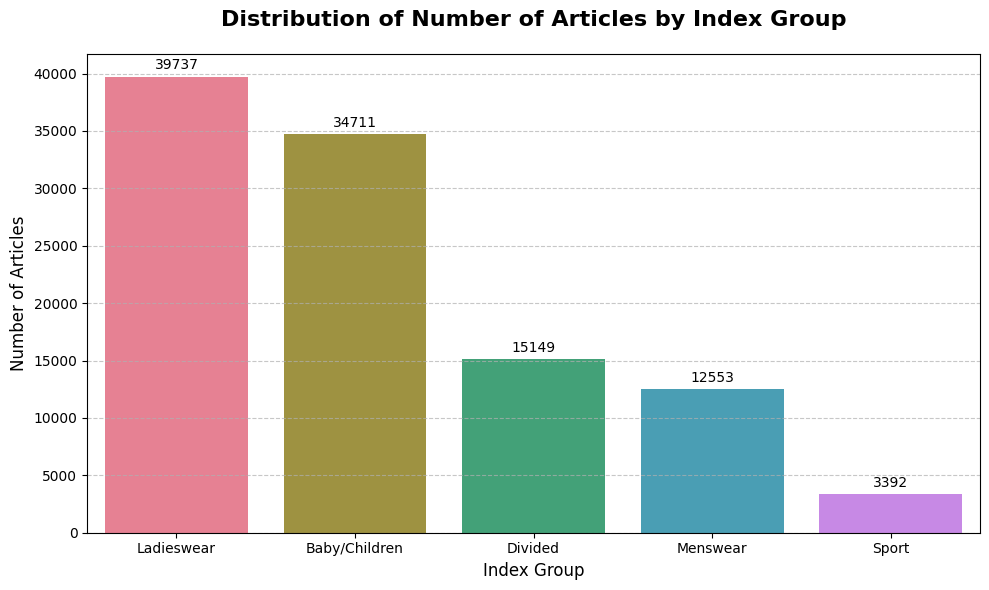

In [ ]:
# Distribution of Number of Articles by Index Group
# Matplotlib and Seaborn version

# Prepare the data
df = (articles_df.groupby("index_group_name")["article_id"]
      .nunique()
      .reset_index()
      .rename(columns={"index_group_name": "Index Group", "article_id": "Articles"})
      .sort_values("Articles", ascending=False))

# Set the color palette
num_groups = df['Index Group'].nunique()
palette = sns.color_palette("husl", num_groups)

# Make a plot
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Index Group', y='Articles', data=df, palette=palette, hue='Index Group', legend=False)

# Add data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 8),
                textcoords='offset points', fontsize=10)

# Customize the title, labels, and axis
ax.set_title('Distribution of Number of Articles by Index Group', fontsize=16, weight='bold', pad=20)
ax.set_xlabel('Index Group', fontsize=12)
ax.set_ylabel('Number of Articles', fontsize=12)

# Rotate x-axis labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add subtle gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Distribution of Number of Articles by Index Group
# Plotly version

# Prepare the data
df = (articles_df.groupby("index_group_name")["article_id"]
      .nunique()
      .reset_index()
      .rename(columns={"index_group_name": "Index Group", "article_id": "Articles"})
      .sort_values("Articles", ascending=False))

# Make a plot
fig = px.bar(
    df,
    x='Index Group',
    y='Articles',
    color='Index Group',
    title='Distribution of Number of Articles by Index Group',
    labels={'Index Group': 'Index Group', 'Articles': 'Number of Articles'},
    color_discrete_sequence=px.colors.qualitative.Prism
)

# Add data labels to the bars
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Customize the layout
fig.update_layout(
    title={"text": "Distribution of Number of Articles by Index Group", "x": 0.5},
    xaxis_title='Index Group',
    yaxis_title='Number of Articles',
    showlegend=False,
    plot_bgcolor="rgba(0,0,0,0)",
    font=dict(family="Arial, sans-serif", size=12)
)

# Show the plot
fig.show()

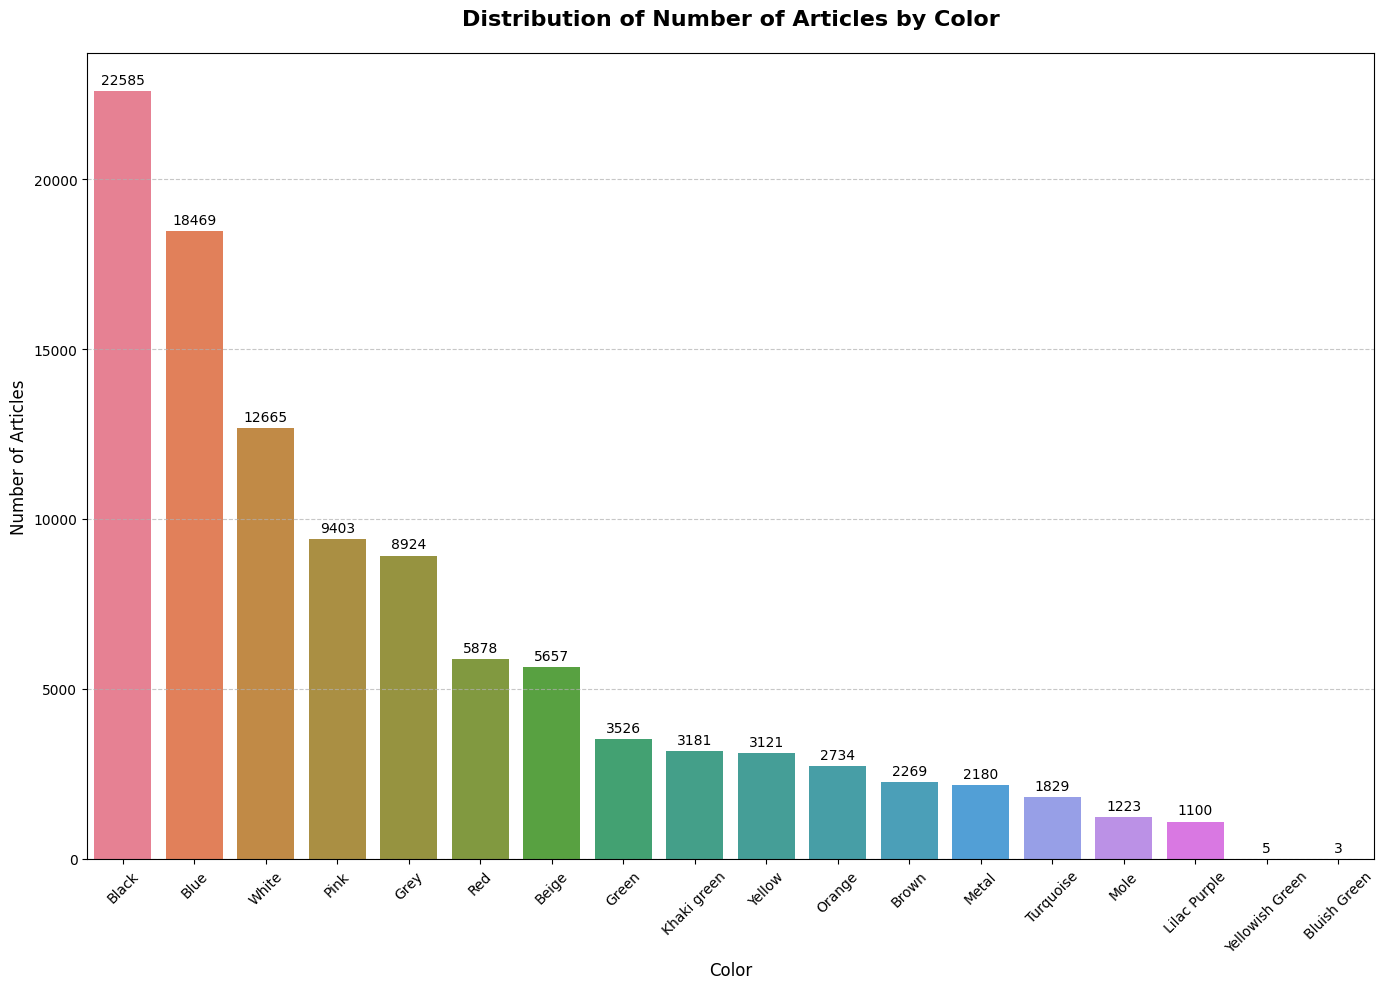

In [18]:
# Distribution of number of articles by color
# Matplotlib and Seaborn version

# Remove 'unknown' and 'undefined' from the perceived_colour_master_name column
articles_df_filtered = articles_df[~articles_df['perceived_colour_master_name'].isin(['unknown', 'undefined', 'Unknown'])]

# Prepare the data by grouping and sorting
temp = articles_df_filtered.groupby(["perceived_colour_master_name"])["article_id"].nunique()
df = pd.DataFrame({'Color': temp.index, 'Articles': temp.values})
df = df.sort_values(['Articles'], ascending=False)


# Set the color palette
num_groups = df['Color'].nunique()
palette = sns.color_palette("husl", num_groups)

# Make a plot
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='Color', y='Articles', data=df, palette=palette, hue='Color', legend=False)

# Add data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 8),
                textcoords='offset points', fontsize=10)

# Customize title, labels, and axes
ax.set_title('Distribution of Number of Articles by Color', fontsize=16, weight='bold', pad=20)
ax.set_xlabel('Color', fontsize=12)
ax.set_ylabel('Number of Articles', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add subtle gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# Distribution of number of articles by color
# Plotly version

# Remove 'unknown' and 'undefined' from the perceived_colour_master_name column
articles_df_filtered = articles_df[~articles_df['perceived_colour_master_name'].isin(['unknown', 'undefined', 'Unknown'])]

# Prepare the data
temp = articles_df_filtered.groupby(["perceived_colour_master_name"])["article_id"].nunique()
df = pd.DataFrame({'Color': temp.index, 'Articles': temp.values})
df = df.sort_values(['Articles'], ascending=False)

# Make a plot
fig = px.bar(
    df,
    x='Color',
    y='Articles',
    color='Color',
    title='Distribution of Number of Articles by Color',
    labels={'Color': 'Color', 'Articles': 'Number of Articles'},
    color_discrete_sequence=px.colors.qualitative.Vivid,
    text='Articles'
)

# Customize the layout
fig.update_layout(
    title={"text": "Distribution of Number of Articles by Color", "x": 0.5},
    xaxis_title='Color',
    yaxis_title='Number of Articles',
    xaxis_tickangle=-45,
    plot_bgcolor="rgba(0,0,0,0)",
    font=dict(family="Arial, sans-serif", size=12),
    xaxis={'categoryorder': 'total descending'},
    showlegend=False
)

# Show the plot
fig.show()

In [ ]:
# Number of Product by Type in Product Group
# Aggregate the number of articles per product type within each product group
grouped_df = articles_df.groupby(['product_group_name', 'product_type_name']).size().reset_index(name='count')

# Sort the DataFrame by product_group_name and count of articles
sorted_df = grouped_df.sort_values(by=['product_group_name', 'count'], ascending=[True, False])

# Display the sorted DataFrame
pd.options.display.max_rows = None
sorted_df

product_group_name         product_type_name  count
23             Accessories                Hat/beanie   1349
3              Accessories                       Bag   1280
12             Accessories                   Earring   1159
27             Accessories         Other accessories   1034
29             Accessories                     Scarf   1013
21             Accessories           Hair/alice band    854
32             Accessories                Sunglasses    621
26             Accessories                  Necklace    581
10             Accessories                Cap/peaked    573
5              Accessories                      Belt    458
24             Accessories                  Hat/brim    396
17             Accessories                    Gloves    367
18             Accessories                 Hair clip    244
28             Accessories                      Ring    240
19             Accessories               Hair string    238
6              Accessories                  Bracelet    180
33             Accessories                       Tie    141
35             Accessories                    Wallet     77
36             Accessories                     Watch     73
4              Accessories                    Beanie     56
30             Accessories                 Soft Toys     46
34             Accessories                  Umbrella     26
20             Accessories                 Hair ties     24
37             Accessories               Waterbottle     22
11             Accessories                  Dog Wear     20
16             Accessories                   Giftbox     15
9              Accessories                       Cap     13
13             Accessories                  Earrings     11
15             Accessories                  Felt hat     10
0              Accessories           Accessories set      7
8              Accessories                Bucket hat      7
1              Accessories                Alice band      6
31             Accessories                 Straw hat      6
2              Accessories                  Baby Bib      3
7              Accessories                    Braces      3
14             Accessories                Eyeglasses      2
22             Accessories                  Hairband      2
25             Accessories                  Headband      1
43                    Bags           Weekend/Gym bag      9
38                    Bags                  Backpack      6
40                    Bags            Cross-body bag      5
41                    Bags              Shoulder bag      2
42                    Bags                  Tote bag      2
39                    Bags                    Bumbag      1
45                Cosmetic            Fine cosmetics     46
44                Cosmetic           Chem. cosmetics      3
46                     Fun                       Toy      2
47               Furniture                Side table     13
49       Garment Full body                     Dress  10362
51       Garment Full body               Garment Set   1320
52       Garment Full body         Jumpsuit/Playsuit   1147
50       Garment Full body                 Dungarees    309
48       Garment Full body                  Costumes     90
53       Garment Full body           Outdoor overall     64
58      Garment Lower body                  Trousers  11169
56      Garment Lower body                    Shorts   3939
57      Garment Lower body                     Skirt   2696
54      Garment Lower body           Leggings/Tights   1878
55      Garment Lower body          Outdoor trousers    130
69      Garment Upper body                   Sweater   9302
70      Garment Upper body                   T-shirt   7904
72      Garment Upper body                       Top   4155
60      Garment Upper body                    Blouse   3979
65      Garment Upper body                    Jacket   3940
68      Garment Upper body                     Shirt   3405
73      Garment Upper body                  Vest

# 'Customers' Data


*   customer_id : A unique identifier of every customer
*   FN : 1 or missed
*   Active : 1 or missed
*   club_member_status : Status in club
*   fashion_news_frequency : How often H&M may send news to customer
*   age : The current age
*   postal_code : Postal code of customer




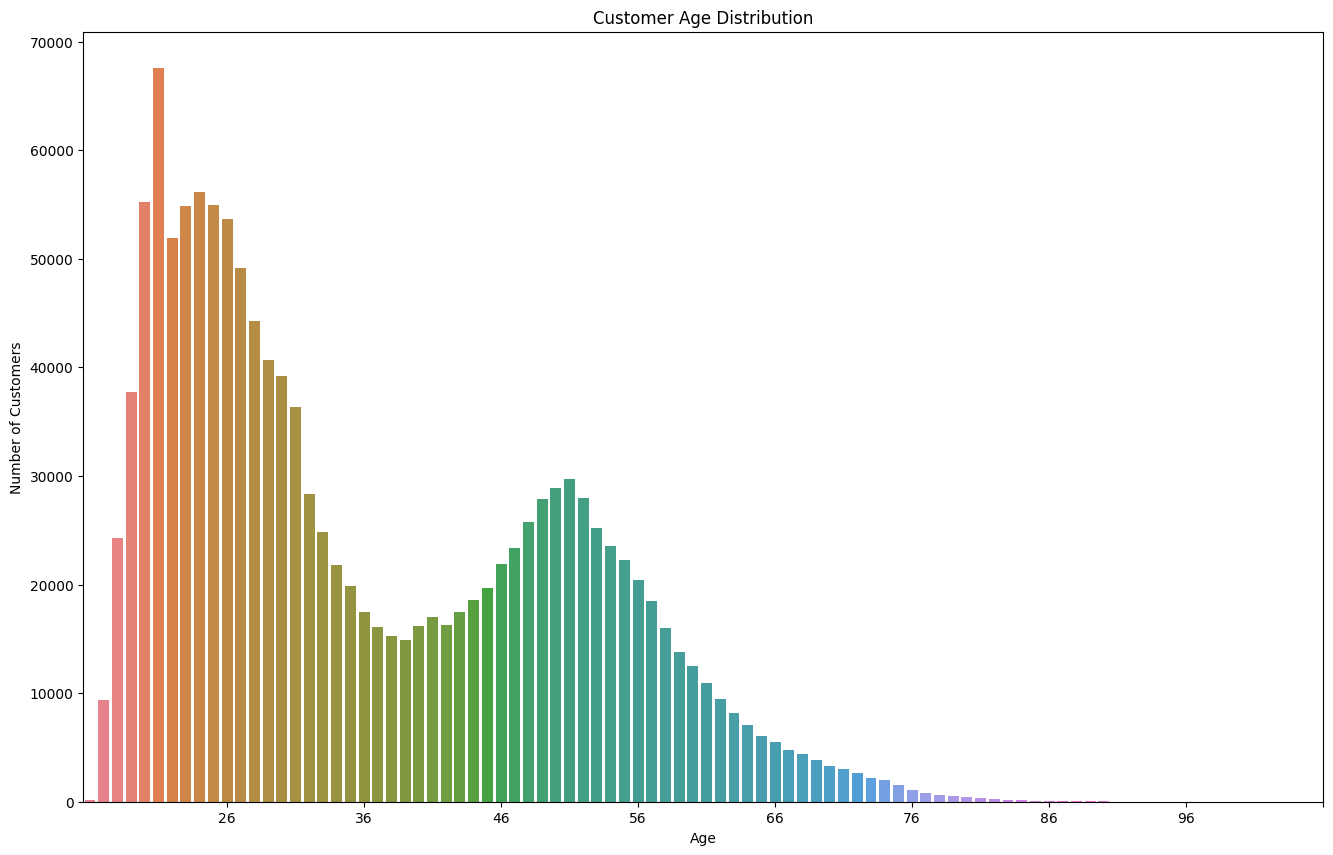

In [28]:
# Customer Age Distribution
# Matplotlib and Seaborn version

# Prepare the data
temp = customers_df.groupby(["age"])["customer_id"].count()
df = pd.DataFrame({'age': temp.index, 'customers': temp.values})
df = df.sort_values(['age'], ascending=False)

# Convert 'age' column to integer
df['age'] = df['age'].astype(int)

# Set the color palette
num_groups = df['age'].nunique()
palette = sns.color_palette("husl", num_groups)

# Plotting
plt.figure(figsize = (16,10))
plt.title('Customer Age Distribution')
s = sns.barplot(x = 'age', y="customers", data=df, palette=palette, hue='age', legend=False)

plt.xticks(ticks=range(10, df['age'].max() + 1, 10))
plt.xlabel("Age")
plt.ylabel("Number of Customers")

plt.show()

In [ ]:
# Customer Age Distribution
# Plotly version

# Prepare the data
df = (customers_df.groupby("age")["customer_id"]
      .nunique()
      .reset_index()
      .rename(columns={"age": "Age", "customer_id": "Customers"})
      .sort_values("Customers", ascending=False))

# Make a plot
fig = px.bar(
    df,
    x='Age',
    y='Customers',
    title='Customer Age Distribution',
    color='Age',
    color_discrete_sequence=px.colors.qualitative.Prism,
    hover_data={"Customers": True},
    labels={"Customers": "Number of Customers", "Age": "Age"}
)

# Update the layout
fig.update_layout(
    title={"text": "Customer Age Distribution", "x": 0.5},
    xaxis_title='Age',
    yaxis_title='Number of Customers',
    showlegend=False,
    plot_bgcolor="rgba(0,0,0,0)",
    font=dict(family="Arial, sans-serif", size=12)
)

# Update x-axis
fig.update_xaxes(categoryorder="total descending")

# Show the plot
fig.show()

<ipython-input-45-d072ca116371>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




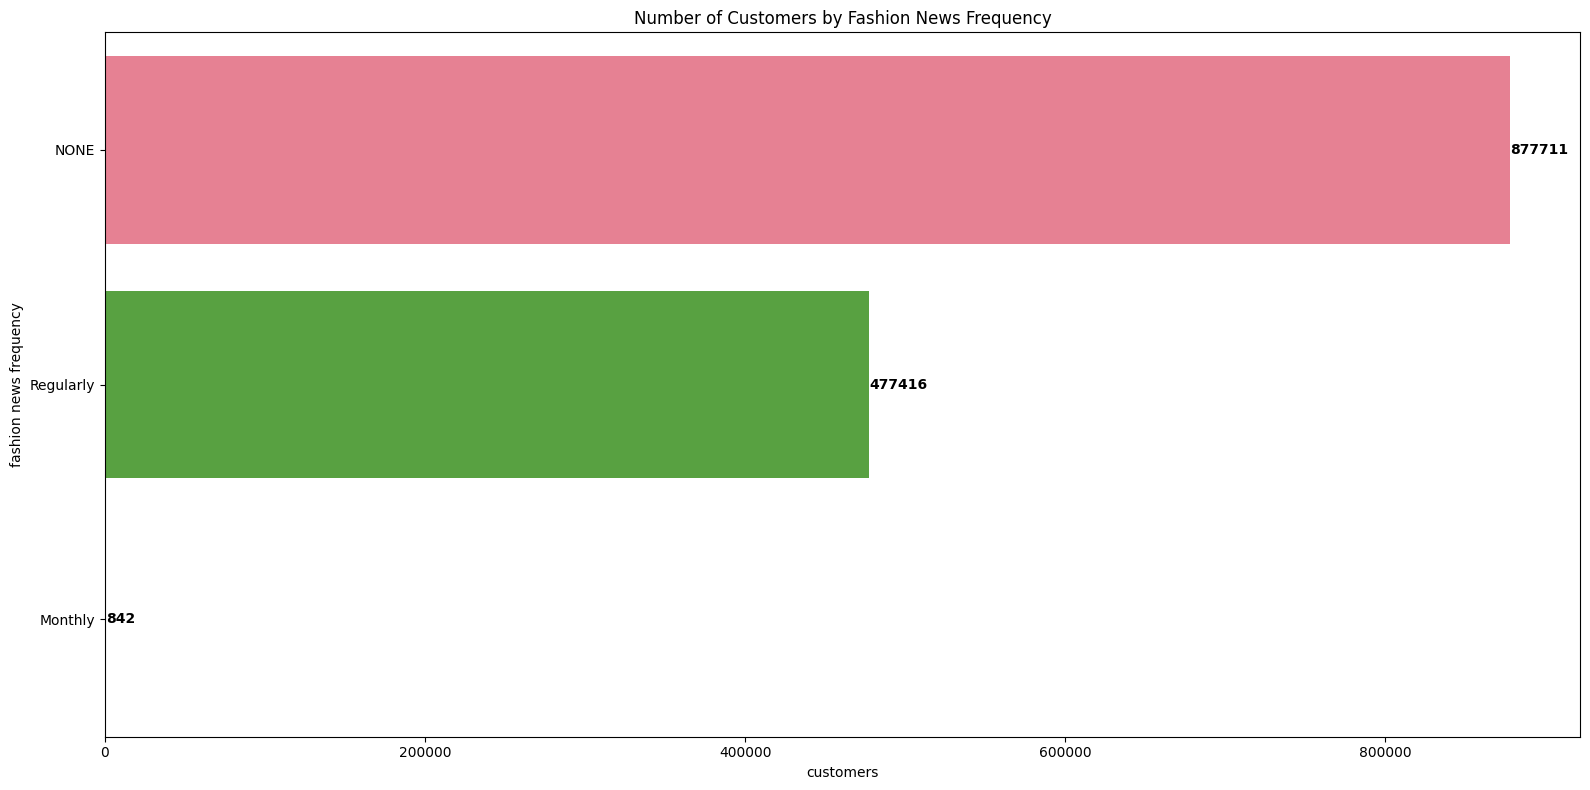

In [ ]:
# Number of customers with Fashion News Frequency
# Matplotlib and Seaborn version

# Prepare the data
temp = customers_df.groupby(["fashion_news_frequency"])["customer_id"].count()
df = pd.DataFrame({'fashion news frequency': temp.index, 'customers': temp.values})
df = df.sort_values(['customers'], ascending=False)

# Set the color palette
num_groups = df['fashion news frequency'].nunique()
palette = sns.color_palette("husl", num_groups)

# Make a plot
plt.figure(figsize=(16, 8))
plt.title('Number of Customers by Fashion News Frequency')
s = sns.barplot(x='customers', y="fashion news frequency", data=df, palette=palette, legend=False)

# Add data labels
for index, value in enumerate(df['customers']):
    plt.text(value, index, f'{value}', va='center', ha='left', fontsize=10, color='black', weight='bold')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [29]:
# Number of customers with Fashion News Frequency
# Plotly version

# Prepare the data
temp = customers_df.groupby(["fashion_news_frequency"])["customer_id"].count()
df = pd.DataFrame({'fashion news frequency': temp.index, 'customers': temp.values})
df = df.sort_values(['customers'], ascending=False)

# Make a plot
fig = px.bar(
    df,
    x='customers',
    y='fashion news frequency',
    color='fashion news frequency',
    title='Number of Customers with Fashion News Frequency',
    labels={'customers': 'Number of Customers', 'fashion news frequency': 'Fashion News Frequency'},
    color_discrete_sequence=px.colors.qualitative.Prism
)

# Add data labels to the bars
fig.update_traces(texttemplate='%{x}', textposition='outside')

# Customize the layout
fig.update_layout(
    title={"text": "Number of Customers with Fashion News Frequency", "x": 0.5},
    xaxis_title='Number of Customers',
    yaxis_title='Fashion News Frequency',
    showlegend=False,
    plot_bgcolor="rgba(0,0,0,0)",
    font=dict(family="Arial, sans-serif", size=12)
)

# Show the plot
fig.show()

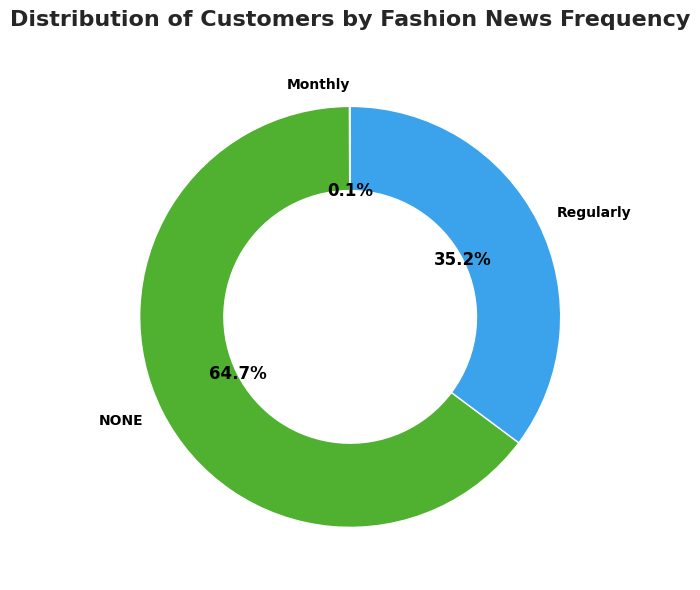

In [ ]:
# Distribution of customers by fashion news frequency
# Matplotlib and Seaborn version

# Group the data
pie_data = customers_df[['customer_id', 'fashion_news_frequency']].groupby('fashion_news_frequency').count()

# Make a plot
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Distribution of Customers by Fashion News Frequency', fontsize=16, weight='bold', pad=20)

# Set colors and labels
colors = sns.color_palette('husl', len(pie_data))
labels = pie_data.index

# Create the pie chart
wedges, texts, autotexts = ax.pie(
    pie_data['customer_id'],
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    textprops=dict(color="black", weight='bold'),
    wedgeprops=dict(width=0.4)
    )

# Format the autotexts
for autotext in autotexts:
    autotext.set_size(12)
    autotext.set_weight('bold')

# Improve layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
# Distribution of customers by fashion news frequency
# Plotly Version

# Group the data
pie_data = customers_df[['customer_id', 'fashion_news_frequency']].groupby('fashion_news_frequency').count().reset_index()
pie_data.columns = ['fashion_news_frequency', 'customers']

# Make a plot
fig = px.pie(
    pie_data,
    names='fashion_news_frequency',
    values='customers',
    title='Distribution of Customers by Fashion News Frequency',
    color_discrete_sequence=px.colors.qualitative.Vivid,
    hole=0.4
)

# Add percentage labels inside the pie chart
fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    insidetextorientation='radial'
)

# Update layout
fig.update_layout(
    title_x=0.5,
    font=dict(size=14),
    showlegend=True
)

# Show a plot
fig.show()

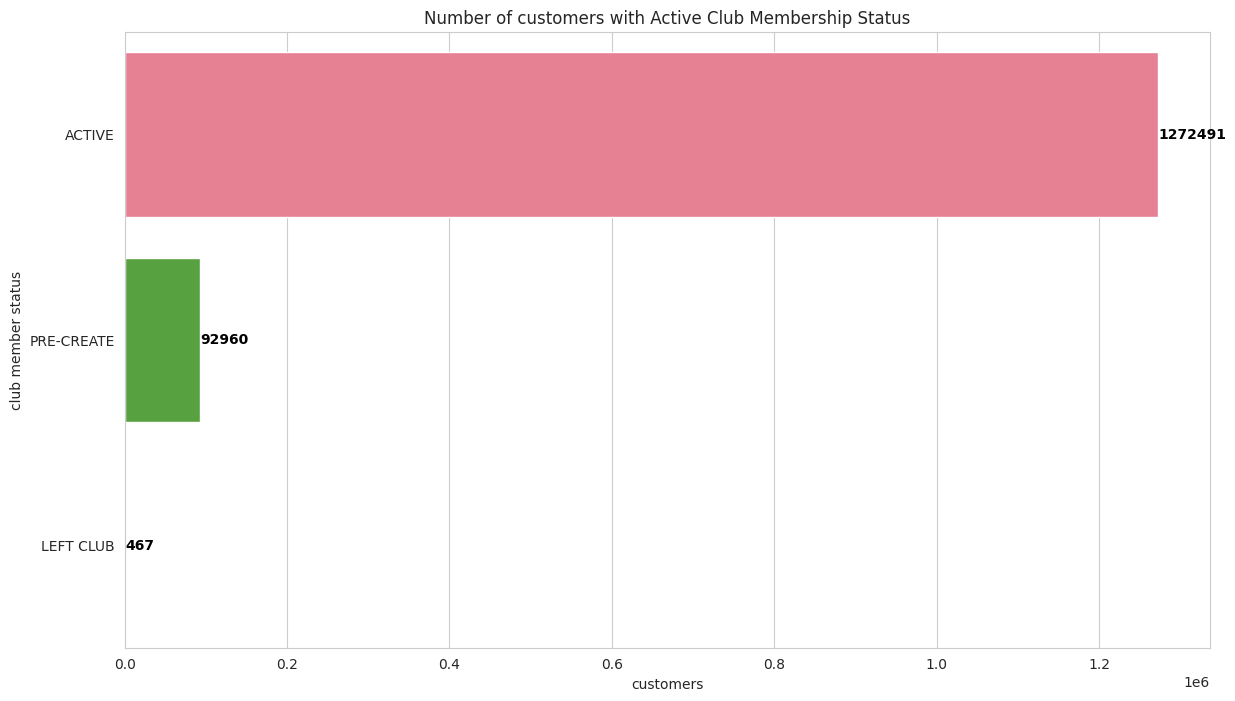

In [ ]:
# Number of customers with active Club Membership Status
# Matplotlib and Seaborn version

# Prepare the data
temp = customers_df.groupby(["club_member_status"])["customer_id"].count()
df = pd.DataFrame({'club member status': temp.index, 'customers': temp.values})
df = df.sort_values(['customers'], ascending=False)

# Set the color palette
num_groups = df['club member status'].nunique()
palette = sns.color_palette("husl", num_groups)

# Make a plot
plt.figure(figsize = (14,8))
plt.title('Number of customers with Active Club Membership Status')
s = sns.barplot(x = 'customers', y="club member status", data=df, palette=palette, hue='club member status', legend=False)

# Add data labels on top of the bars
for index, value in enumerate(df['customers']):
    plt.text(value, index, f'{value}', va='center', ha='left', fontsize=10, color='black', weight='bold')

# Show plot
plt.show()

In [ ]:
# Number of customers with active Club Membership Status
# Plotly version

# Prepare the data
temp = customers_df.groupby(["club_member_status"])["customer_id"].count()
df = pd.DataFrame({'club member status': temp.index, 'customers': temp.values})
df = df.sort_values(['customers'], ascending=False)

# Make a plot
fig = px.bar(
    df,
    x='customers',
    y='club member status',
    color='club member status',
    title='Number of customers with active Club Membership Status',
    labels={'customers': 'Number of Customers', 'club member status': 'Club Member Status'},
    color_discrete_sequence=px.colors.qualitative.Vivid,
)

# Add data labels to the bars
fig.update_traces(texttemplate='%{x}', textposition='outside')

# Customize the layout
fig.update_layout(
    title={"text": "Number of customers with Active Club Membership Status", "x": 0.5},
    xaxis_title='Number of Customers',
    yaxis_title='Club Member Status',
    showlegend=False,
    plot_bgcolor="rgba(0,0,0,0)",
    font=dict(family="Arial, sans-serif", size=12)
)

# Show the plot
fig.show()

# 'Transactions' Data

*   t_dat : A unique identifier of every customer
*   customer_id : A unique identifier of every customer (in customers table)
*   article_id : A unique identifier of every article (in articles table)
*   price : Price of purchase
*   sales_channel_id : 1 or 2

<ipython-input-55-9d2b0cfc6f5c>:11: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-55-9d2b0cfc6f5c>:12: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




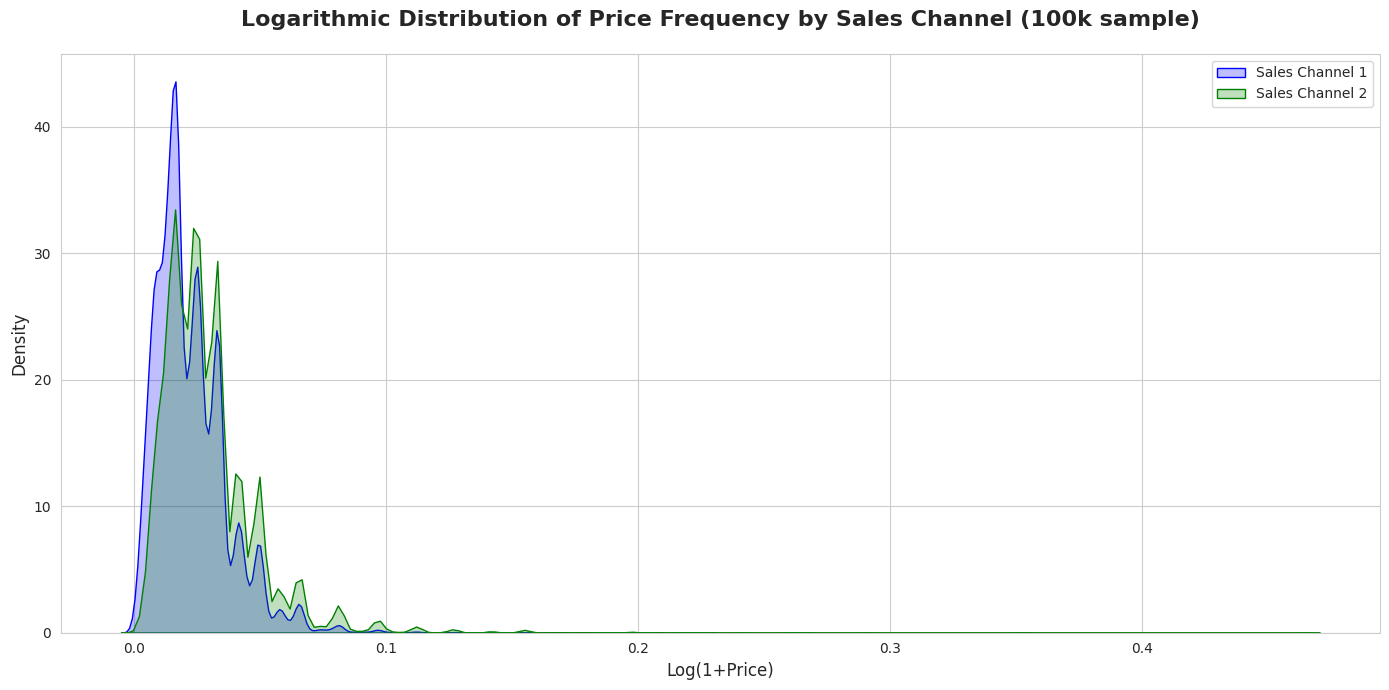

In [ ]:
# Distribution of price by sales channel
# Matplotlib and Seaborn version

# Sample the data for better performance
df = transactions_train_df.sample(100_000)

# Create subplots
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

# KDE plots
sns.kdeplot(np.log1p(df.loc[df["sales_channel_id"] == 1, "price"].dropna()), ax=ax, label='Sales Channel 1', color='blue', shade=True)
sns.kdeplot(np.log1p(df.loc[df["sales_channel_id"] == 2, "price"].dropna()), ax=ax, label='Sales Channel 2', color='green', shade=True)

# Set titles and labels
ax.set_title("Logarithmic Distribution of Price Frequency by Sales Channel (100k sample)", fontsize=16, weight='bold', pad=20)
ax.set_xlabel("Log(1+Price)", fontsize=12)
ax.set_ylabel("Density", fontsize=12)

# Add a legend and display the plot
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Distribution of price by sales channel
# Plotly version

# Sample data for better performance
df = transactions_train_df.sample(100_000)

# Log-transform prices and handle NaN values
df['log_price'] = np.log1p(df['price'].dropna())

# Create traces for sales channels 1 and 2
trace1 = go.Histogram(
    x=df[df['sales_channel_id'] == 1]['log_price'],
    histnorm='probability density',
    name='Sales Channel 1',
    marker_color='blue',
    opacity=0.7,
    nbinsx=50
)

trace2 = go.Histogram(
    x=df[df['sales_channel_id'] == 2]['log_price'],
    histnorm='probability density',
    name='Sales Channel 2',
    marker_color='green',
    opacity=0.7,
    nbinsx=50
)

# Create the figure
fig = go.Figure()

# Add traces to the figure
fig.add_trace(trace1)
fig.add_trace(trace2)

# Update layout
fig.update_layout(
    title='Logarithmic Distribution of Price Frequency by Sales Channel (100k sample)',
    xaxis_title='Log(1+Price)',
    yaxis_title='Density',
    barmode='overlay',
    legend_title='Sales Channel',
    legend=dict(x=0.7, y=0.9),
    xaxis=dict(title_text='Log(1+Price)'),
    yaxis=dict(title_text='Density'),
    template='plotly_white'
)

# Show the plot
fig.show()

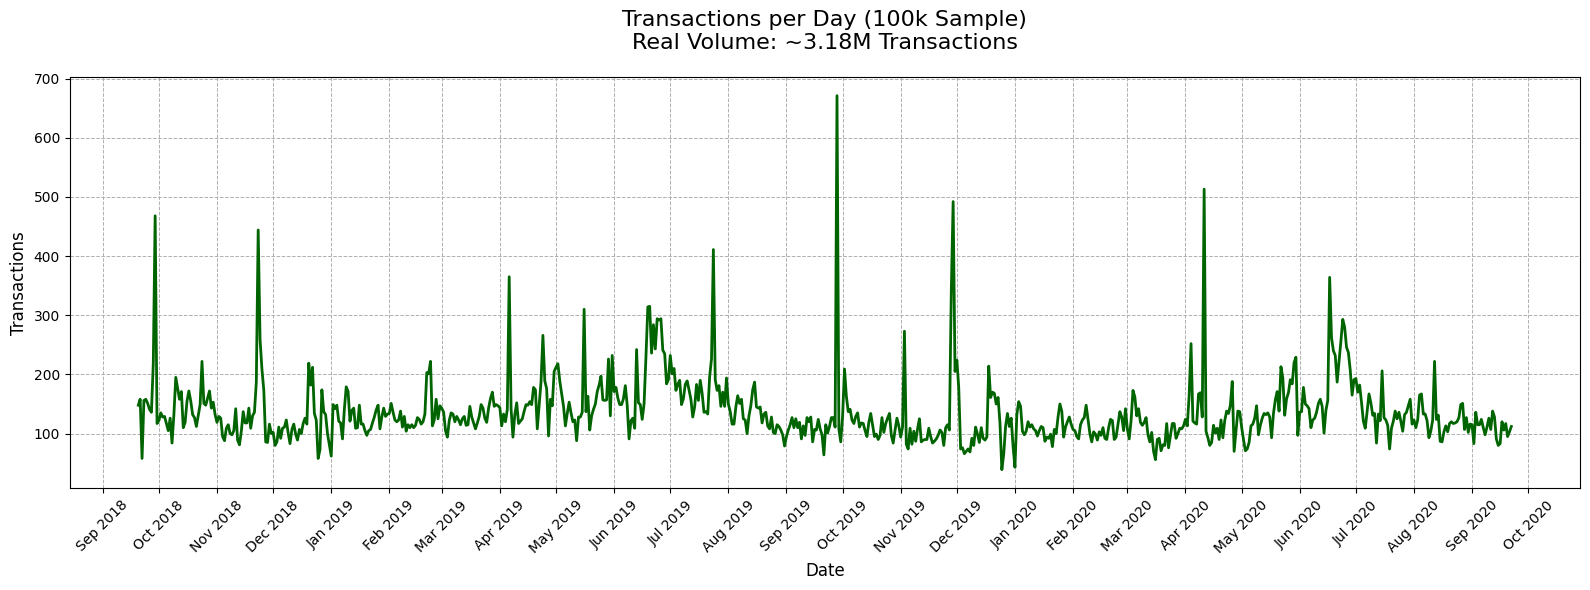

In [30]:
# Transactions per day
# Matplotlib and Seaborn version

# Sample and group data by date, counting transactions per day
df = transactions_train_df.sample(100_000).groupby(["t_dat"])["article_id"].count().reset_index()

# Convert date strings to datetime objects
df["t_dat"] = pd.to_datetime(df["t_dat"])

# Rename columns
df.columns = ["Date", "Transactions"]

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(16,6))

# Plot the data
ax.plot(df["Date"], df["Transactions"], color="Darkgreen", linewidth=2)

# Add labels
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Transactions", fontsize=12)

# Format the title with dynamic transaction count
total_transactions = round(transactions_train_df.shape[0] / 10.e6, 2)
ax.set_title(f"Transactions per Day (100k Sample)\nReal Volume: ~{total_transactions}M Transactions", fontsize=16, pad=20)

# Format the x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

# Add a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.7)

# Make the y-axis ticks easier to read
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Transactions per day
# Plotly version

# Sample and group data by date, counting transactions per day
df = transactions_train_df.sample(100_000).groupby(["t_dat"])["article_id"].count().reset_index()

# Convert date strings to datetime objects
df["t_dat"] = pd.to_datetime(df["t_dat"])

# Rename columns
df.columns = ["Date", "Transactions"]

# Make a plot
fig = px.line(
    df,
    x="Date",
    y="Transactions",
    title=f"Transactions per Day (100k Sample)<br>Real Volume: ~{round(transactions_train_df.shape[0] / 10.e6, 2)}M Transactions",
    labels={"Date": "Date", "Transactions": "Number of Transactions"},
    line_shape='linear'
)

# Customize the layout
fig.update_layout(
    title_x=0.5,
    font=dict(family="Arial, sans-serif", size=12),
    plot_bgcolor="rgba(0, 0, 0, 0)",
    xaxis=dict(
        title="Date",
        tickformat="%b %Y",
        tickangle=-45,
    ),
    yaxis=dict(
        title="Transactions",
        showgrid=True,
        gridcolor="LightGray"
    )
)

# Show the plot
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



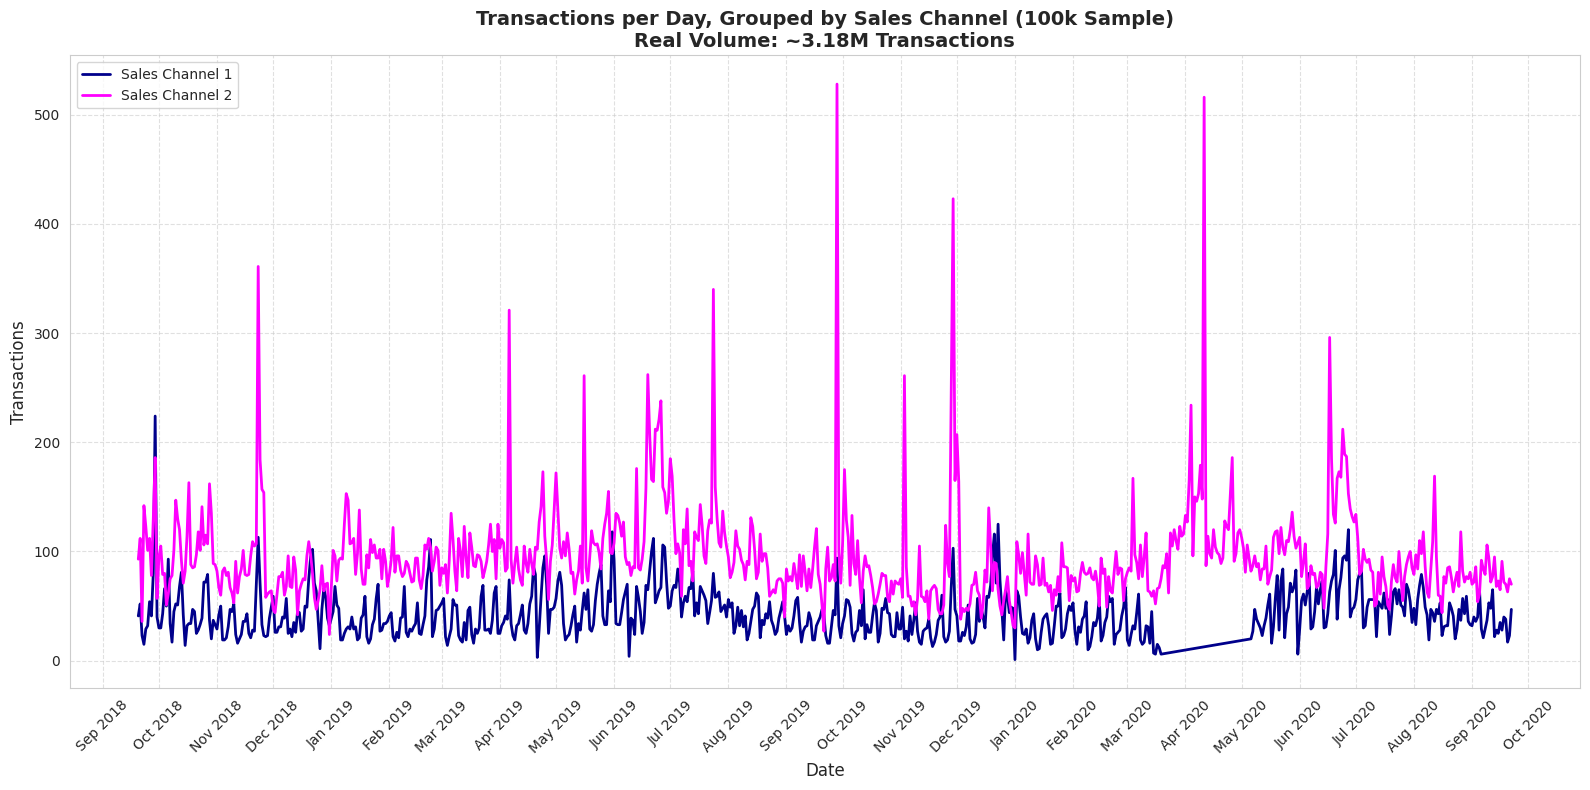

In [ ]:
# Transactions per day by sales channel
# Matplotlib and Seaborn version

# Sample and group data by date and sales channel, counting transactions per day
df = transactions_train_df.sample(100_000).groupby(["t_dat", "sales_channel_id"])["article_id"].count().reset_index()

# Convert date strings to datetime objects
df["t_dat"] = pd.to_datetime(df["t_dat"], format='%Y-%m-%d')

# Rename columns
df.columns = ["Date", "Sales Channel Id", "Transactions"]

# Make a plot
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

# Plot data for Sales Channel 1 and Sales Channel 2
g1 = ax.plot(df.loc[df["Sales Channel Id"] == 1, "Date"], df.loc[df["Sales Channel Id"] == 1, "Transactions"],
             label="Sales Channel 1", color="Darkblue", linewidth=2)
g2 = ax.plot(df.loc[df["Sales Channel Id"] == 2, "Date"], df.loc[df["Sales Channel Id"] == 2, "Transactions"],
             label="Sales Channel 2", color="Magenta", linewidth=2)

# Formatting the x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

# Adding grid lines
ax.grid(True, linestyle='--', alpha=0.6)

# Add axis labels and title
plt.xlabel("Date", fontsize=12)
plt.ylabel("Transactions", fontsize=12)
plt.title(f"Transactions per Day, Grouped by Sales Channel (100k Sample)\nReal Volume: ~{round(transactions_train_df.shape[0]/10.e6, 2)}M Transactions", fontsize=14, weight='bold')

# Set legend position and display the plot
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [37]:
# Transactions per day by sales channel
# Plotly version

# Sample and group data by date and sales channel, counting transactions per day
df = transactions_train_df.sample(100_000).groupby(["t_dat", "sales_channel_id"])["article_id"].count().reset_index()

# Convert date strings to datetime objects
df["t_dat"] = pd.to_datetime(df["t_dat"], format='%Y-%m-%d')

# Rename columns
df.columns = ["Date", "Sales Channel Id", "Transactions"]

# Make a plot
fig = px.line(
    df,
    x="Date",
    y="Transactions",
    color="Sales Channel Id",
    line_shape='linear',
    title=f"Transactions per Day, Grouped by Sales Channel",
    labels={"Date": "Date", "Transactions": "Number of Transactions"},
    color_discrete_map={"1": "Darkblue", "2": "Magenta"}
)

# Customize the layout
fig.update_layout(
    title={"text": "Transactions per Day, Grouped by Sales Channel", "x": 0.5},
    xaxis_title='Date',
    yaxis_title='Number of Transactions',
    xaxis=dict(
        tickformat="%b %Y",
        tickangle=-45
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor="LightGray"
    ),
    plot_bgcolor="rgba(0,0,0,0)",
    font=dict(family="Arial, sans-serif", size=12),
)

# Show the plot
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



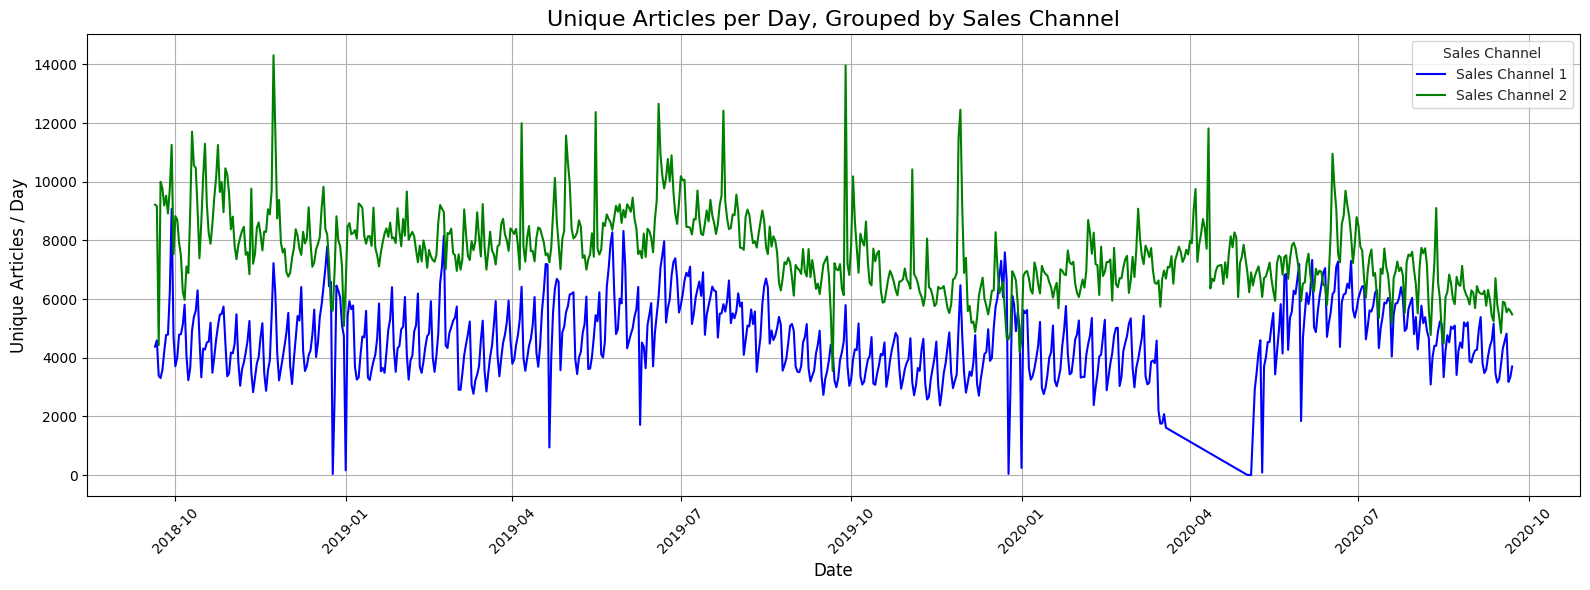

In [33]:
# Unique customers per day by sales channel
# Matplotlib and Seaborn version

# Group the data and prepare the DataFrame
df = transactions_train_df.groupby(["t_dat", "sales_channel_id"])["article_id"].nunique().reset_index()
df["t_dat"] = pd.to_datetime(df["t_dat"])
df.columns = ["Date", "Sales Channel Id", "Unique Articles"]

# Initialize figure and axis
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

# Loop through sales channels
colors = {1: "Blue", 2: "Green"}
for channel_id, color in colors.items():
    ax.plot(df[df["Sales Channel Id"] == channel_id]["Date"],
            df[df["Sales Channel Id"] == channel_id]["Unique Articles"],
            label=f"Sales Channel {channel_id}",
            color=color)

# Add labels, title, legend and grid
sns.set_style("whitegrid")
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Unique Articles / Day", fontsize=12)
ax.set_title("Unique Articles per Day, Grouped by Sales Channel", fontsize=16)
ax.legend(title="Sales Channel", fontsize=10)
ax.grid(True)

# Improve date formatting
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Unique customers per day by sales channel
# Plotly version

# Group the data and prepare the DataFrame
df = transactions_train_df.groupby(["t_dat", "sales_channel_id"])["article_id"].nunique().reset_index()
df["t_dat"] = pd.to_datetime(df["t_dat"])
df.columns = ["Date", "Sales Channel Id", "Unique Articles"]

# Initialize the figure
fig = go.Figure()

# Define color mapping for sales channels
colors = {1: "Blue", 2: "Green"}

# Loop through sales channels
for channel_id, color in colors.items():
    fig.add_trace(go.Scatter(x=df[df["Sales Channel Id"] == channel_id]["Date"],
                             y=df[df["Sales Channel Id"] == channel_id]["Unique Articles"],
                             mode='lines',
                             name=f"Sales Channel {channel_id}",
                             line=dict(color=color)))

# Update layout with titles and labels
fig.update_layout(
    title={
        'text': 'Unique Articles per Day, Grouped by Sales Channel',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Date',
    yaxis_title='Unique Articles / Day',
    xaxis=dict(tickformat='%Y-%m-%d', showgrid=True, title_standoff=20),
    yaxis=dict(showgrid=True),
    legend=dict(
        title='Sales Channel',
        yanchor="top",
        y=0.95,
        xanchor="left",
        x=0.75
    ),
    width=900,
    height=600
)

# Show plot
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# Merged data

In [39]:
transactions_train_s = transactions_train_df[['article_id', 'customer_id', 't_dat', 'price']]
articles_s = articles_df[['article_id']]
customers_s = customers_df[['customer_id']]

In [40]:
print(transactions_train_s.columns)
print(articles_s.columns)
print(customers_s.columns)

Index(['article_id', 'customer_id', 't_dat', 'price'], dtype='object')
Index(['article_id'], dtype='object')
Index(['customer_id'], dtype='object')


In [41]:
merged_df = transactions_train_s.merge(articles_s, on='article_id', validate='many_to_one')
merged_df = merged_df.merge(customers_s,on='customer_id',validate='many_to_one')

In [44]:
# Total Unique Customers
# Convert the 't_dat' column to datetime and extract the year
transactions_train_df['t_dat'] = pd.to_datetime(transactions_train_df['t_dat'], errors="coerce")
transactions_train_df['year'] = transactions_train_df['t_dat'].dt.year

# Group the data by year and calculate the total unique customers
unique_customers_yoy = transactions_train_df.groupby('year')['customer_id'].nunique().reset_index()
unique_customers_yoy.columns = ['Year', 'Total Unique Customers']

# Calculate YoY change and format it as a percentage
unique_customers_yoy['YoY Change (%)'] = unique_customers_yoy['Total Unique Customers'].pct_change() * 100

# Create a bar chart
bar = px.bar(unique_customers_yoy, x='Year', y='Total Unique Customers',
             title='Total Unique Customers by Year (YoY Change)',
             text='Total Unique Customers')

# Add annotations for YoY change directly on the plot
for i, row in unique_customers_yoy.iterrows():
    if pd.notnull(row['YoY Change (%)']):
        bar.add_annotation(x=row['Year'], y=row['Total Unique Customers'],
                           text=f"{row['YoY Change (%)']:.2f}%",
                           showarrow=False, yshift=10, font=dict(size=10, color="black"))

# Update axes labels and ensure year values are treated as discrete
bar.update_xaxes(title_text='Year', tickmode='linear', tick0=unique_customers_yoy['Year'].min(), dtick=1)
bar.update_yaxes(title_text='Total Unique Customers')

# Display the chart
bar.show()

In [45]:
# New and Lost Customers Over the Years
# Convert 't_dat' to datetime and extract year
transactions_train_df['t_dat'] = pd.to_datetime(transactions_train_df['t_dat'], errors='coerce')
transactions_train_df['year'] = transactions_train_df['t_dat'].dt.year

# Sort the data for consistency
transactions_train_df.sort_values(by=['year', 'customer_id'], inplace=True)

# Initialize variables
previous_year_customers = set()
years = sorted(transactions_train_df['year'].unique())
new_customers_count = []
lost_customers_count = []

# Loop through each year and calculate new and lost customers
for year in years:
    current_year_customers = set(transactions_train_df[transactions_train_df['year'] == year]['customer_id'])

    # Calculate new and lost customers
    new_customers = current_year_customers - previous_year_customers
    lost_customers = previous_year_customers - current_year_customers

    # Store the results
    new_customers_count.append(len(new_customers))
    lost_customers_count.append(len(lost_customers))

    # Update previous year customers
    previous_year_customers = current_year_customers

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Year': years,
    'New Customers': new_customers_count,
    'Lost Customers': lost_customers_count
})

# Create a chart
fig = px.bar(
    plot_data,
    x='Year',
    y=['New Customers', 'Lost Customers'],
    title='New and Lost Customers Over the Years',
    labels={'value': 'Customer Count', 'variable': 'Customer Type'},
    barmode='stack',
)

# Improve layout and display the chart
fig.update_layout(xaxis_title='Year', yaxis_title='Customer Count')
fig.show()

In [ ]:
# Price Trend Over Months
# Create the chart
fig = px.line(z, x='month', y='price', title='Price Trend Over Months', markers=True)

# Show the plot
fig.show()

# Reference

https://www.kaggle.com/code/gpreda/h-m-eda-and-prediction#Articles-data
https://www.kaggle.com/code/amangiri/data-snapshot#Hypothesis-Testing
https://www.kaggle.com/code/vanguarde/h-m-eda-first-look